In [ ]:
!pip install pymorphy2 nltk
import nltk
nltk.download("punkt")
nltk.download("stopwords")

     |████████████████████████████████| 55 kB 3.5 MB/s 
     |████████████████████████████████| 8.2 MB 30.2 MB/s 
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
from IPython.core.display import Image, display
%matplotlib inline
import seaborn as sns
from matplotlib import pyplot as plt
import pylab as pl
import re
import codecs
!pip install pymorphy2    #
import pymorphy2
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
%pylab inline
pylab.rcParams['figure.figsize'] = (15,10)
import re                 #
import csv                #
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
nltk.download('punkt')
nltk.download('stopwords')

Populating the interactive namespace from numpy and matplotlib
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
!pip install gensim

In [ ]:
from google.colab import drive
import os
# drive.mount('/content/drive/')
drive.mount("/content/drive/", force_remount=True)

Mounted at /content/drive/


In [ ]:
col_names = ['id', 'date', 'name', 'text', 'positive', 'rep', 'rtv', 'fav', 'total_count', 'fol', 'friends', 'list_count']
df_pos = pd.read_csv('/content/drive/MyDrive/school21/day07/datasets/positive.csv', sep=';',  comment='#', header=None, names=col_names)
df_neg = pd.read_csv('/content/drive/MyDrive/school21/day07/datasets/negative.csv', sep=';',  comment='#', header=None, names=col_names)
df = pd.concat([df_pos, df_neg], axis=0, ignore_index=True)
df.positive[df.positive == -1] = 0

In [ ]:
nik_name = 'rriddler'
df.to_pickle('/content/drive/MyDrive/school21/day06/datasets_'+nik_name+'.pkl')

In [ ]:
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import pymorphy2

In [ ]:
morph = pymorphy2.MorphAnalyzer()


def text_preprocessing(text):
    """Функция принимает строку и возвращает список слов в начальной форме"""
    text = text.lower()                                                         # приводим текст к нижнему регистру
    text = re.sub(r"[^А-Яа-я]", " ", text)                                      # удаляем все некириллические символы
    words = word_tokenize(text)                                                 # разбиваем тексты на списки слов
    words = [morph.parse(word)[0].normal_form for word in words]                # приводим слова к начальной форме
    words = [word for word in words if word not in stopwords.words("russian")]  # удаляем слова из стоп-листа
    return words

In [ ]:
# preprocessed_df = df[["text", "positive"]]
# preprocessed_df.text = df.text.apply(text_preprocessing)
# preprocessed_df.to_pickle('/content/drive/MyDrive/school21/day06/preprocessed_'+nik_name+'.pkl')

In [34]:
preprocessed_df = pd.read_pickle('/content/drive/MyDrive/school21/day06/preprocessed_rriddler.pkl')

In [36]:
preprocessed_df.head(3)

,text,positive
0,"[школотый, поверь, самый, общество, профилиров...",1
1,"[всё, таки, немного, похожий, мальчик, всё, ра...",1
2,"[идиотка, испугаться]",1


# Задание 1 

Напишите функцию, которая принимает на вход любой текст в виде строки и применяет к нему метод n-грамм, n передаётся в параметрах функции и является целым числом. На выходе должен быть список с n-граммами.

In [37]:
# Код выполнения задания 1
# import nltk

# def text_to_2_gramms(text):
#   return list(nltk.ngrams(text, 2))

In [38]:
def ft_gramm(text: str, n: int):
  list_grams = []
  grams = nltk.ngrams(text.split(), n)
  for gram in grams:
      list_grams.append(gram)
  return (list_grams)

# 1. N-граммы

N-грамма - последовательность повторяющихся символов или токенов, где N-число символов / токенов.
Данный метод применятется при переводе текста в векторное пространство, часто в
связке с TF-IDF.

Виды N-грамм:


*   Посимвольные
*   Пословные

Пример: "Днём мама мыла раму". 
Пословная 2-грамма: днём мама, мама мыла, мыла раму.



In [27]:
import nltk

text = 'Разделим этот текст пословно'
grams = nltk.ngrams(text.split(), 3)

for gram in grams:
    print(gram)

('Разделим', 'этот', 'текст')
('этот', 'текст', 'пословно')


Приемущества:


*   простота (не сильно усложняют модель в целом)
*   высокая селективность

Недостатки:


*   быстрый рост размерности признакового пространства
*   векторы получаются очень разреженными (много нулей)
*   близкие по смыслу слова кодируются независмо, поэтому может упасть качество обобщающей способности
*   из-за высокой размерности выше шанс переобучения





Но есть хорошая новость: в предыдущем задании векторное пространство можно было сжать до заданной величины с помощью word2vec, и обработка становилась проще. Здесь это тоже работает.

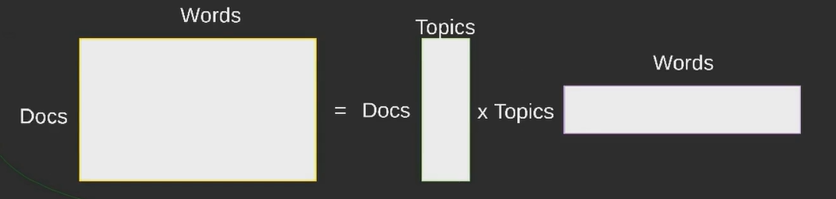

# Задание 2

BLEU (bilingual evaluation understudy) - метрика для оценивания качества машинного перевода, основанная на сравнении перевода, предложенного алгоритмом, и референсного перевода (ground truth). Сравнение производится на основе подсчета n-грамм (n меняется от 1 до некоторого порога, например, 4), которые встретились и в предложенном переводе, и в референсном (ground truth). После подсчета совстречаемости n-грамм полученная метрика умножается на так называемый brevity penalty - штраф за слишком короткие варианты перевода. Brevity penalty считается как <количество слов в переводе, предложенном алгоритмом> / <количество слов в референсном переводе>.

Формула:

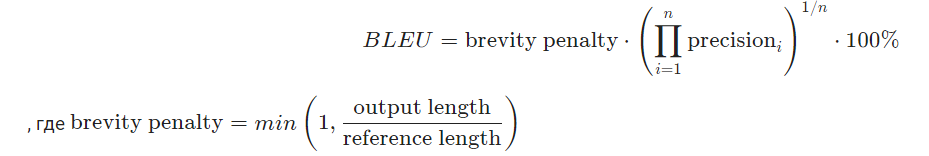

Пример решения
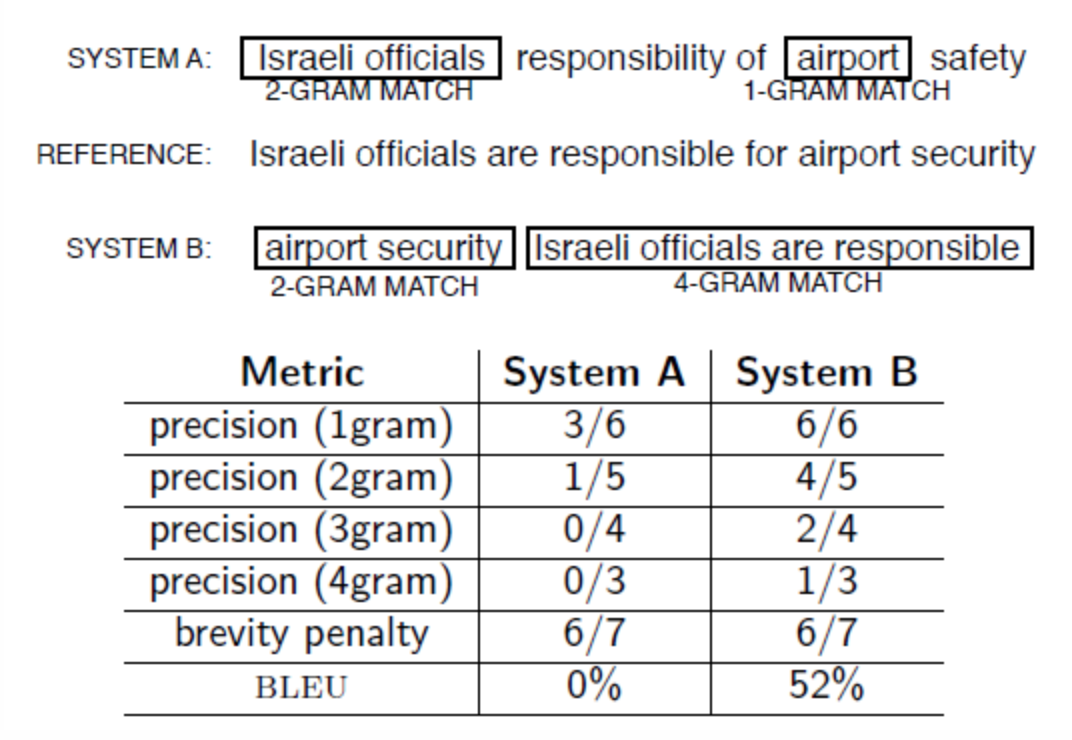

Источник: https://sysblok.ru/nlp/kak-mashinnyj-perevod-ocenivaet-mashina/?share=twitter

Напишите функцию для вычисления BLEU-score. На вход принимается две строки: перевод, предложенный алгоритмом, и референсный перевод. При подсчете метрики учитывайте n-граммы с n ∈ [1,2,3].

Перевод, предложенный алгоритмом: "Кошка вышла из дома и села на крыльцо"

Референсный перевод (ground truth): "Кошка вышла из комнаты и села на ступеньки"

На выходе должен быть ответ в виде процентов, округлённый до целых.

In [39]:
# Код выполнения задания 2
def ft_bleu_score(system: str, ground_truth: str):
    precision = [0, 0, 0]
    brevity_penalty = min(1, len(system.split(" ")) / len(ground_truth.split(" ")))
    for n in range(1, 4):
        list_system = ft_gramm(system, n)
        list_ground_truth = ft_gramm(ground_truth, n)
        precision[n - 1] = 0
        for i in list_system:
            if (i in list_ground_truth):
                precision[n - 1] += 1
        precision[n - 1] = precision[n - 1] / len(list_system)
    bleu = brevity_penalty * pow(precision[0] * precision[1] * precision[2], 1/3)* 100
    return int(bleu)

bleu = ft_bleu_score("Кошка вышла из дома и села на крыльцо", "Кошка вышла из комнаты и села на ступеньки")
bleu

52

# Задание 3

Вспомните методы векторизации из прошлых уроков и проведите аналогичную классификацию, но также применив n-граммы. Сравните результаты.

Проведите классификацию текстов с применением n-грамм:


1.   Проведите предобработку
2.   Примените n-граммы с значением n = 2. Выше брать не будем, иначе расчеты могут сильно увеличиться по времени
3.   Проведите векторизацию с помощью Word2Vec
4.   Обучите на полученных данных модель градиентного бустинга
5.   Сравните эффективность модели, обученой ранее без применения n-грамм, с полученными моделями по показателю precision



In [56]:
# # Код выполнения задания 3
# import nltk

# text = 'Разделим этот текст пословно'
# grams = nltk.ngrams(text.split(), 3)

# for gram in grams:
#     print(gram)

In [63]:
def create_ngramm(text, n):
  return list(nltk.ngrams(text.split(), n))

In [65]:
def word_split(s):
    return s.split()
def text_ngram(s):
    arr = create_ngramm(s, 2)
    return [i[0] + ' ' + i[1] for i in arr]
preprocessed_df.text_lem = list(map(word_split, df.text))
preprocessed_df['text_ngram'] = list(map(text_ngram, df.text))
preprocessed_df.head(3)

,text,positive,text_ngram
0,"[школотый, поверь, самый, общество, профилиров...",1,"[@first_timee хоть, хоть я, я и, и школота,, ш..."
1,"[всё, таки, немного, похожий, мальчик, всё, ра...",1,"[Да, все-таки, все-таки он, он немного, немног..."
2,"[идиотка, испугаться]",1,"[RT @KatiaCheh:, @KatiaCheh: Ну, Ну ты, ты иди..."


In [75]:
# for j in preprocessed_df.text:
#   str_text = ''
#   for i in j:
#     str_text += i + ' '
# # preprocessed_df['new_text'] = preprocessed_df.text.apply.ft_gramm(str_text.strip(), 2)    
# preprocessed_df['text_ngram'] = list(map(ft_gramm(str_text.strip(), 2), preprocessed_df.text))

TypeError: ignored

In [52]:
# def text_to_2_gramms(text):
#     return text_ngram(" ".join(text))

In [67]:
# gramm_df.text = preprocessed_df.text.apply(text_to_2_gramms)

In [68]:
# learning_df = pd.DataFrame()

# vectors = list()
# positive = list()

# for i, tweet in enumerate(preprocessed_df.vector):
#   for vector in tweet:
#     vectors.append(vector)
#     positive.append(preprocessed_df.positive.values)

# learning_df.head()    

In [69]:
# from gensim.models import Word2Vec

# # def word2vec(text, size, min_count):
# #   w2v = Word2Vec(size=size, min_count=min_count)
# #   w2v.build_vocab(text)
# #   return w2v.wv

# def word2vec(ngramms, model=w2v):
#   nlst = list()
#   for gramm in ngramms:
#     try:
#       nlst.append(model.wv.get_vector(gramm))
#     except KeyError:
#       pass
#   return nlst      

In [ ]:
vectors = word2vec

In [61]:
# проверка задания 3

text = 'Средства у нас есть, у нас ума не хватает'
prep_text = text_preprocessing(text)  # содержимое этой переменной сравнить с чек-листом
grammed_text = text_to_2_gramms(prep_text) # содержимое этой переменной сравнить с чек-листом

vectorized_grammed_text = word2vec(grammed_text)  # содержимое этой переменной сравнить с чек-листом -> набор чисел (вектор)
model_score = grad_boost(vectorized_grammed_text) # содержимое этой переменной сравнить с чек-листом -> precision, число от 0 до 1

NameError: ignored

# Задание 4

Используя модель LDA, кластеризуйте твиты на положительные и негативные. Для этого:
1. Проведите предобработку данных
2. Представьте корпус твитов в виде Терм-документной матрицы (CountVectorizer), не забудьте о стоп-словах
3. Поэксперементируйте с параметром `max-iter` модели, подберите лучший вариант. [Документация](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.LatentDirichletAllocation.html)
4. В качестве оценки используйте степень правдоподобия (Log-likehood). Сделайте сравнительный анализ степеней правдоподобия, соответсвующих каждому рассмотренному набору параметров (например, в виде графиков зависимости степени правдоподобия от конкретного параметра).

In [ ]:
# Код выполнения задания 4


# 2. Метод LDA (Latent Dirichlet Allocation - Латентное размещение Дирихле) и тематическое моделирование

LDA - один из методов тематического моделирования, позволяющий решить задачу классификации или кластеризации, где каждый класс или кластер содержит в себе тексты со схожими темами.

По сути тематическое моделирование - это такая мягкая кластеризация на текстах (хотя этот метод может быть расширен на данные любой природы, не только текстовые). Тематическая модель позволяет отнести текст к одной или нескольким темам с некторой вероятностью. Каждая тема, в свою очередь, характеризуются наиболее вероятными для неё словами.

К достоинствам можно отнести то, что это обучение без учителя, т.е. для обучения нам не требуются размеченные данные. 

Это же является и недостатком - тематическую модель довольно сложно настраивать, ведь нет чёткого представления чего мы хотим.

Для того, чтобы применять к датасету текстов LDA, необходимо преобразовать корпус в term-document matrix (Терм-документная матрица).

Терм-документная матрица — это матрица которая имеер размер $N \times W$, где
N — количество документов в корпусе, а W — размер словаря корпуса т.е. количество уникальных слов, которые встречаются в нашем корпусе. В i-й строке, j-м столбце матрицы находится число — сколько раз в i-м тексте встретилось j-е слово.

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
import pymorphy2


morph = pymorphy2.MorphAnalyzer()
corpus = [
    'Это текст про информационные технологии: разработка, искусственный интеллект, сети',
    'Текст про видео игры',
    'Ферма, крупный рогатый скот, зерновые культуры, в общем сельское хозяйство'      
]

tokens_corpus = [nltk.word_tokenize(item) for item in corpus]
lems_corpus = [' '.join([morph.parse(elem)[0].normal_form for elem in item]) 
              for item in tokens_corpus]

vectorizer = CountVectorizer()
X = vectorizer.fit_transform(lems_corpus)
vectorizer.get_feature_names_out()

array(['видео', 'зерновой', 'игра', 'интеллект', 'информационный',
       'искусственный', 'крупный', 'культура', 'общий', 'про',
       'разработка', 'рогатый', 'сельский', 'сеть', 'скот', 'текст',
       'технология', 'ферма', 'хозяйство', 'это'], dtype=object)

In [ ]:
import pandas as pd

# Терм-документная матрица
pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())

,видео,зерновой,игра,интеллект,информационный,искусственный,крупный,культура,общий,про,разработка,рогатый,сельский,сеть,скот,текст,технология,ферма,хозяйство,это
0,0,0,0,1,1,1,0,0,0,1,1,0,0,1,0,1,1,0,0,1
1,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0
2,0,1,0,0,0,0,1,1,1,0,0,1,1,0,1,0,0,1,1,0


LDA строит, для данной Терм-документной матрицы и T заранее заданого числа тем — два распределения: 

1.   Распределение тем по текстам.(на практике задается матрицей размера $N \times T$)
2.   Распределение слов по темам.(матрица размера $T \times W$)

Значения ячеек данных матриц — это, соответственно. вероятности того, что данная тема содержится в данном документе(или доля темы в документе, если рассматривать документ как смесь разных тем) для матрицы 'Распределение тем по текстам'.


Для матрицы 'Распределение слов по темам' значения — это, соответственно, вероятность встретить в тексте с темой i слово j. Качественно можно рассматривать эти числа как коэффициенты, характеризующие то, насколько данное слово характерно для данной темы.

Источник: https://habr.com/ru/post/417167/

In [ ]:
from sklearn.decomposition import LatentDirichletAllocation

lda = LatentDirichletAllocation(n_components=3)
lda.fit(X)

LatentDirichletAllocation(n_components=3)

In [ ]:
# Распределение слов по темам
pd.DataFrame(lda.exp_dirichlet_component_, columns=vectorizer.get_feature_names_out())

,видео,зерновой,игра,интеллект,информационный,искусственный,крупный,культура,общий,про,разработка,рогатый,сельский,сеть,скот,текст,технология,ферма,хозяйство,это
0,0.007183,0.007102,0.007183,0.007089,0.007089,0.007089,0.007102,0.007102,0.007102,0.007229,0.007089,0.007102,0.007102,0.007089,0.007102,0.007229,0.007089,0.007102,0.007102,0.007089
1,0.002902,0.002879,0.002902,0.057583,0.057583,0.057583,0.002879,0.002879,0.002879,0.058759,0.057583,0.002879,0.002879,0.057583,0.002879,0.058759,0.057583,0.002879,0.002879,0.057583
2,0.045694,0.045791,0.045694,0.002288,0.002288,0.002288,0.045791,0.045791,0.045791,0.044827,0.002288,0.045791,0.045791,0.002288,0.045791,0.044827,0.002288,0.045791,0.045791,0.002288


In [ ]:
# Распределение тем по текстам
pd.DataFrame(lda.transform(X), columns=['IT', 'Games', 'Agricultural industry'])

,IT,Games,Agricultural industry
0,0.033913,0.931773,0.034314
1,0.068229,0.076184,0.855587
2,0.034085,0.033621,0.932294
